In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
# Load the dataset from a CSV file

In [3]:
df = pd.read_csv('Dataset Final.csv', encoding= 'unicode_escape')

In [4]:
# Display the dataset

In [5]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,referral_source,Class,Medication
0,41,F,f,f,f,f,f,f,f,f,...,f,t,1.3,t,2.5,t,125,SVHC,Normal,NaN
1,23,F,f,f,f,f,f,f,f,f,...,f,t,4.1,t,2,t,102,other,Normal,NaN
2,46,M,f,f,f,f,f,f,f,f,...,f,t,0.98,f,?,t,109,other,Normal,NaN
3,70,F,t,f,f,f,f,f,f,f,...,f,t,0.16,t,1.9,t,175,other,Hyperthyroidism,Antithyroid drug
4,70,F,f,f,f,f,f,f,f,f,...,f,t,0.72,t,1.2,t,61,SVI,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,f,?,f,?,f,?,other,Hyperthyroidism,Antithyroid drug
3768,68,F,f,f,f,f,f,f,f,f,...,f,t,1,t,2.1,t,124,SVI,Normal,NaN
3769,74,F,f,f,f,f,f,f,f,f,...,f,t,5.1,t,1.8,t,112,other,Normal,NaN
3770,72,M,f,f,f,f,f,f,f,f,...,f,t,0.7,t,2,t,82,SVI,Normal,NaN


In [6]:
# Check data types of columns

In [7]:
df.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
goitre                       object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
referral_source              object
Class                        object
Medication                   object
dtype: object

In [8]:
# Check for missing values

In [9]:
df.isnull().sum()

age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
goitre                          0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
referral_source                 0
Class                           0
Medication                   2473
dtype: int64

In [10]:
# Count the number of instances for each class

In [11]:
n = len(df[df['Class'] == 'Hyperthyroidism'])
print("No of Hyperthyroidism in Dataset:",n)

n1 = len(df[df['Class'] == 'Hypothyroidism'])
print("No of Hypothyroidism in Dataset:",n1)
n1 = len(df[df['Class'] == 'Normal'])
print("No of normal in Dataset:",n1)

No of Hyperthyroidism in Dataset: 1190
No of Hypothyroidism in Dataset: 109
No of normal in Dataset: 2473


In [12]:
# Check information about the dataset

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  goitre                     3772 non-null   object
 12  hypopituitary              3772 non-null   object
 13  psych                      3772 non-null   object
 14  TSH_meas

In [14]:
# Replace '?' with NaN

In [15]:
import numpy as np

In [16]:
df = df.replace('?', np.nan)

In [17]:
# Check information about the dataset after replacing '?'

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  goitre                     3772 non-null   object
 12  hypopituitary              3772 non-null   object
 13  psych                      3772 non-null   object
 14  TSH_meas

In [19]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
goitre                          0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
referral_source                 0
Class                           0
Medication                   2473
dtype: int64

In [20]:
# Drop the 'Medication' column

In [21]:
df = df.drop(['Medication'], axis=1)

In [22]:
# Drop rows with missing values

In [23]:
new_df=df.dropna()

In [24]:
new_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
goitre                       0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
referral_source              0
Class                        0
dtype: int64

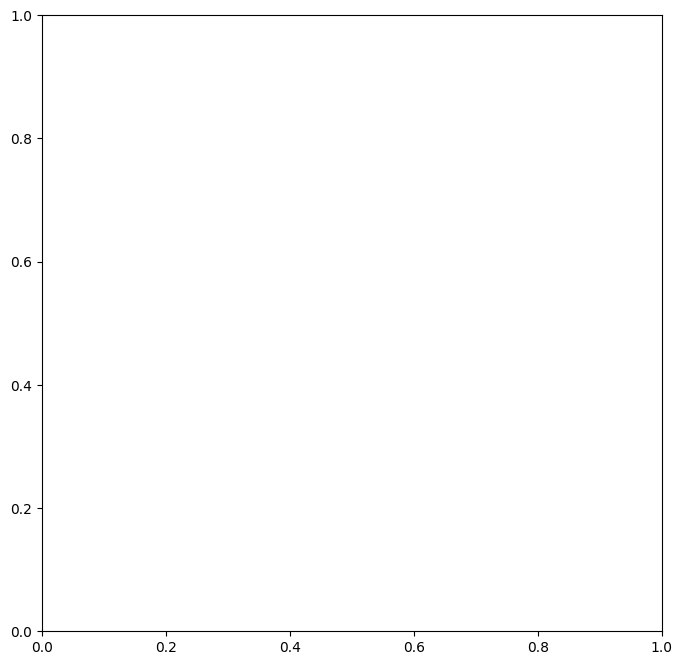

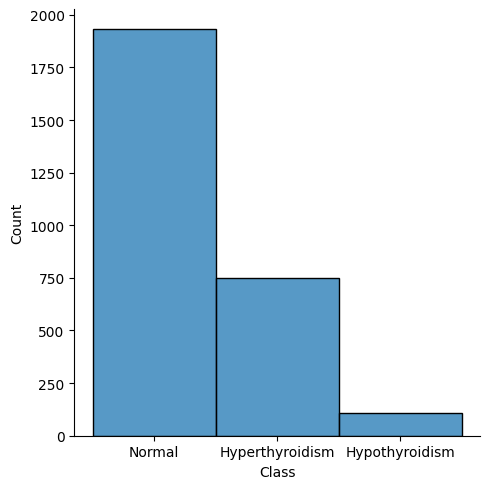

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
sns.displot(new_df['Class'])

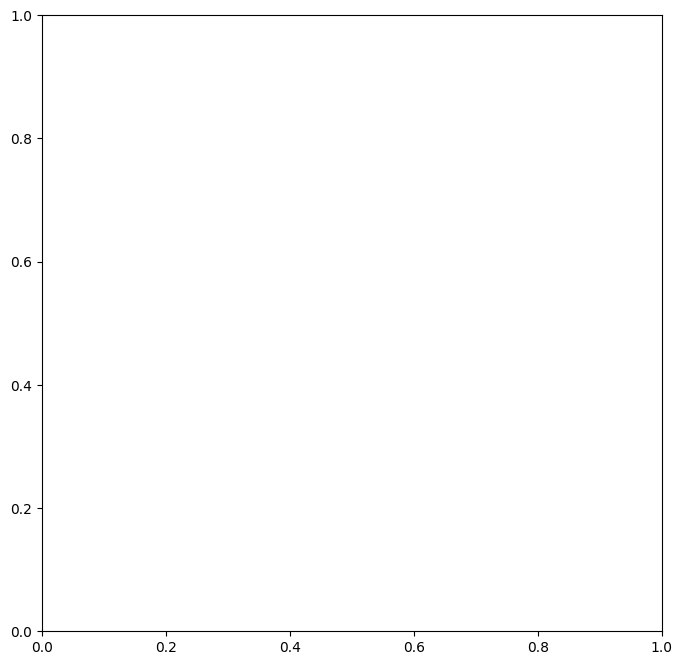

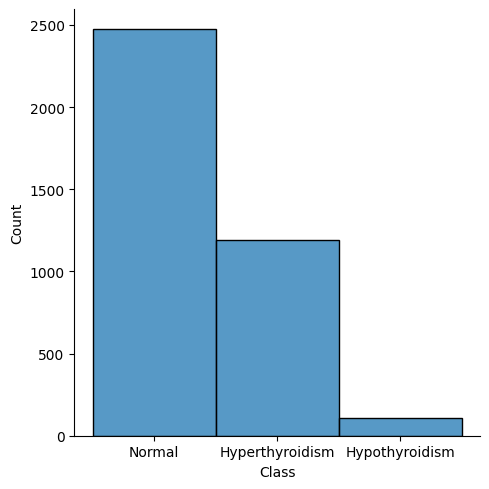

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
sns.displot(df['Class'])

In [27]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
referral_source                0
Class                          0
dtype: int64

In [28]:
df[['TSH','T3','TT4']]=df[['TSH','T3','TT4']].astype(float)

In [29]:
df['TSH'].fillna(df['TSH'].median(), inplace=True)

In [30]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
referral_source                0
Class                          0
dtype: int64

In [31]:
df['T3'].fillna(df['T3'].median(), inplace=True)

In [32]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                          231
referral_source                0
Class                          0
dtype: int64

<AxesSubplot: >

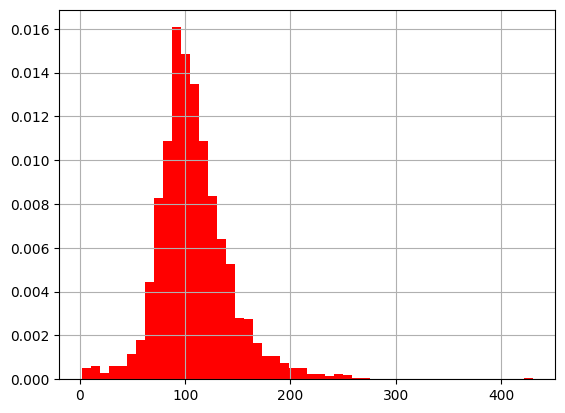

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Original Data
df['TT4'].hist(bins=50, ax=ax, density=True, color='red')

<AxesSubplot: ylabel='Density'>

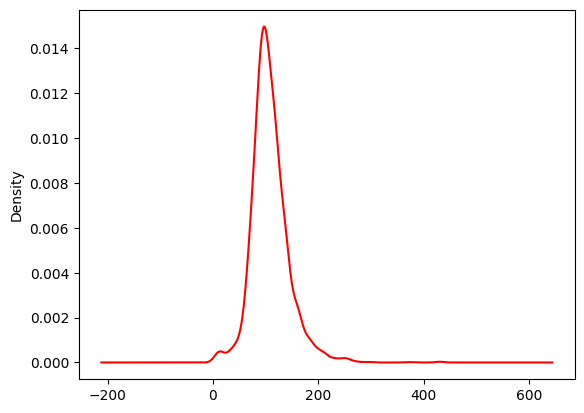

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Original Data
df['TT4'].plot.density(color='red')

In [35]:
df['TT4'].fillna(df['TT4'].median(), inplace=True)

<AxesSubplot: >

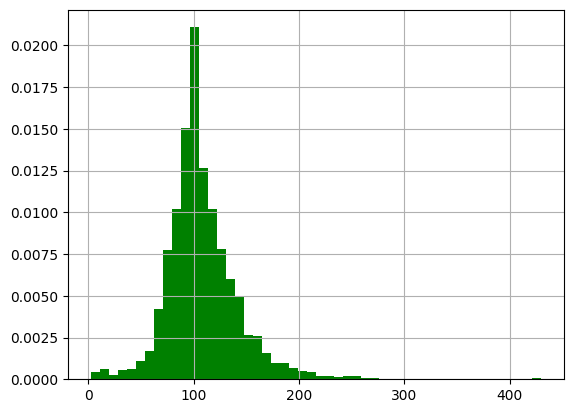

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Final Data
df['TT4'].hist(bins=50, ax=ax, density=True, color='green')

<AxesSubplot: ylabel='Density'>

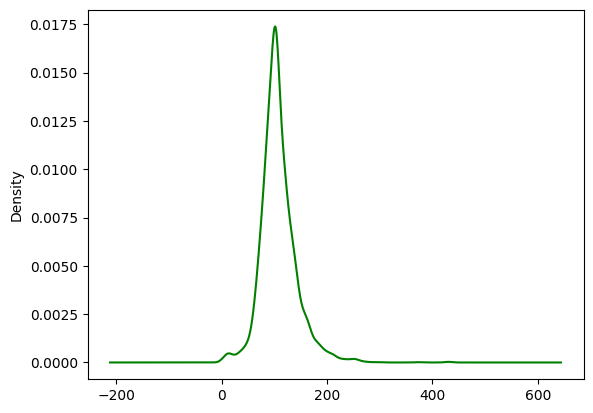

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Original Data
df['TT4'].plot.density(color='green')

In [38]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
referral_source                0
Class                          0
dtype: int64

In [39]:
df.isnull().mean()*100 #Percentage of Data missing

age                          0.026511
sex                          3.976670
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
sick                         0.000000
pregnant                     0.000000
thyroid_surgery              0.000000
I131_treatment               0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
goitre                       0.000000
hypopituitary                0.000000
psych                        0.000000
TSH_measured                 0.000000
TSH                          0.000000
T3_measured                  0.000000
T3                           0.000000
TT4_measured                 0.000000
TT4                          0.000000
referral_source              0.000000
Class                        0.000000
dtype: float64

In [40]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,t,1.30,t,2.5,t,125.0,SVHC,Normal
1,23,F,f,f,f,f,f,f,f,f,...,f,f,t,4.10,t,2.0,t,102.0,other,Normal
2,46,M,f,f,f,f,f,f,f,f,...,f,f,t,0.98,f,2.0,t,109.0,other,Normal
3,70,F,t,f,f,f,f,f,f,f,...,f,f,t,0.16,t,1.9,t,175.0,other,Hyperthyroidism
4,70,F,f,f,f,f,f,f,f,f,...,f,f,t,0.72,t,1.2,t,61.0,SVI,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,f,f,1.40,f,2.0,f,103.0,other,Hyperthyroidism
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,t,1.00,t,2.1,t,124.0,SVI,Normal
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,t,5.10,t,1.8,t,112.0,other,Normal
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,t,0.70,t,2.0,t,82.0,SVI,Normal


In [41]:
df['age'].fillna((df['age'].median()), inplace = True)
df.isnull().sum()

age                            0
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
referral_source                0
Class                          0
dtype: int64

In [42]:
df['age']=df['age'].astype(int)

In [43]:
df.isnull().sum()

age                            0
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
referral_source                0
Class                          0
dtype: int64

In [44]:
most_frequent_sex = df['sex'].mode()[0]

In [45]:
df = df.fillna({'sex': most_frequent_sex})

In [46]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
goitre                       0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
referral_source              0
Class                        0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_4192\17782672.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\User\AppData\Local\Temp\ipykernel_4192\17782672.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\User\AppData\Local\Temp\ipykernel_4192\177826

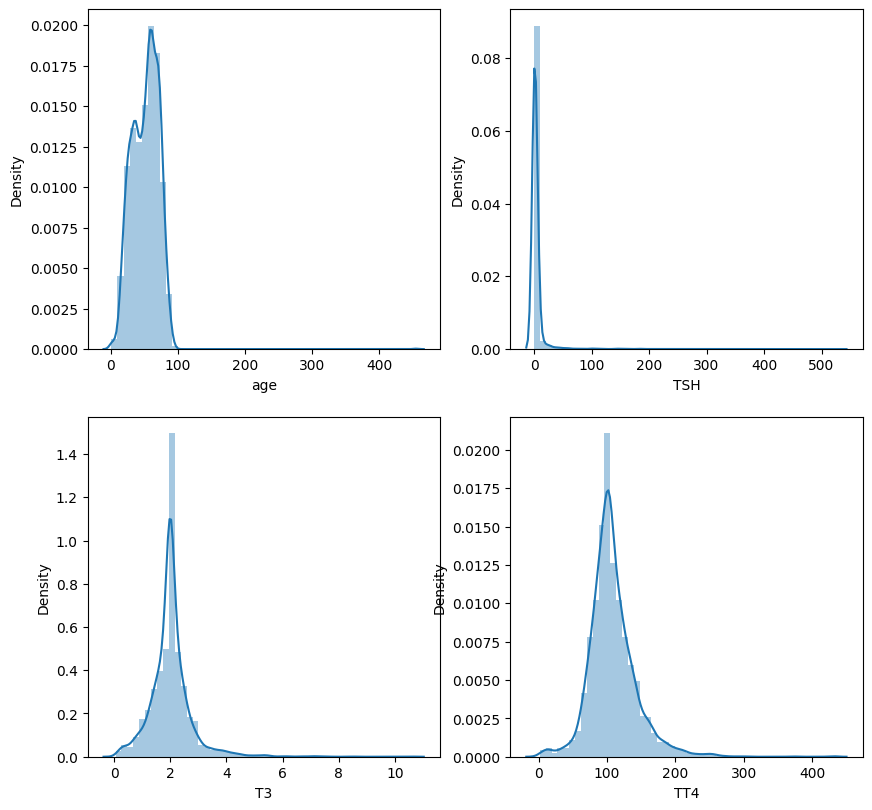

In [47]:
columns = ['age','TSH','T3','TT4']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [48]:
df['age'].unique()

array([ 41,  23,  46,  70,  18,  59,  80,  66,  68,  84,  67,  71,  28,
        65,  42,  63,  51,  81,  54,  55,  60,  25,  73,  34,  78,  37,
        85,  26,  58,  64,  44,  48,  61,  35,  83,  21,  87,  53,  77,
        27,  69,  74,  38,  76,  45,  36,  22,  43,  72,  82,  31,  39,
        49,  62,  57,   1,  50,  30,  29,  75,  19,   7,  79,  17,  24,
        15,  32,  47,  16,  52,  33,  13,  10,  89,  56,  20,  90,  40,
        88,  14,  86,  94,  12,   4,  11,   8,   5, 455,   2,  91,   6,
        93,  92])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  goitre                     3772 non-null   object 
 12  hypopituitary              3772 non-null   object 
 13  psych                      3772 non-null   objec

In [50]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [51]:
df.loc[df['sex']=='F', 'sex'] = 0
df.loc[df['sex']=='M', 'sex'] = 1

In [52]:
df['on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [53]:
df.loc[df['on_thyroxine']=='f', 'on_thyroxine'] = 0
df.loc[df['on_thyroxine']=='t', 'on_thyroxine'] = 1

In [54]:
df.loc[df['query_on_thyroxine']=='f', 'query_on_thyroxine'] = 0
df.loc[df['query_on_thyroxine']=='t', 'query_on_thyroxine'] = 1

In [55]:
df['on_antithyroid_medication'].unique()

array(['f', 't'], dtype=object)

In [56]:
df.loc[df['on_antithyroid_medication']=='f', 'on_antithyroid_medication'] = 0
df.loc[df['on_antithyroid_medication']=='t', 'on_antithyroid_medication'] = 1

In [57]:
df['sick'].unique()

array(['f', 't'], dtype=object)

In [58]:
df.loc[df['sick']=='f', 'sick'] = 0
df.loc[df['sick']=='t', 'sick'] = 1

In [59]:
df['pregnant'].unique()

array(['f', 't'], dtype=object)

In [60]:
df.loc[df['pregnant']=='f', 'pregnant'] = 0
df.loc[df['pregnant']=='t', 'pregnant'] = 1

In [61]:
df['thyroid_surgery'].unique()

array(['f', 't'], dtype=object)

In [62]:
df.loc[df['thyroid_surgery']=='f', 'thyroid_surgery'] = 0
df.loc[df['thyroid_surgery']=='t', 'thyroid_surgery'] = 1

In [63]:
df['I131_treatment'].unique()

array(['f', 't'], dtype=object)

In [64]:
df.loc[df['I131_treatment']=='f', 'I131_treatment'] = 0
df.loc[df['I131_treatment']=='t', 'I131_treatment'] = 1

In [65]:
df['query_hypothyroid'].unique()

array(['f', 't'], dtype=object)

In [66]:
df.loc[df['query_hypothyroid']=='f', 'query_hypothyroid'] = 0
df.loc[df['query_hypothyroid']=='t', 'query_hypothyroid'] = 1

In [67]:
df['query_hyperthyroid'].unique()

array(['f', 't'], dtype=object)

In [68]:
df.loc[df['query_hyperthyroid']=='f', 'query_hyperthyroid'] = 0
df.loc[df['query_hyperthyroid']=='t', 'query_hyperthyroid'] = 1

In [69]:
df['goitre'].unique()

array(['f', 't'], dtype=object)

In [70]:
df.loc[df['goitre']=='f', 'goitre'] = 0
df.loc[df['goitre']=='t', 'goitre'] = 1

In [71]:
df['hypopituitary'].unique()

array(['f', 't'], dtype=object)

In [72]:
df.loc[df['hypopituitary']=='f', 'hypopituitary'] = 0
df.loc[df['hypopituitary']=='t', 'hypopituitary'] = 1

In [73]:
df[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','goitre','hypopituitary','query_hyperthyroid']]=df[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','goitre','hypopituitary','query_hyperthyroid']].astype(int)

In [74]:
df['query_hyperthyroid'].unique()

array([0, 1])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   int32  
 2   on_thyroxine               3772 non-null   int32  
 3   query_on_thyroxine         3772 non-null   int32  
 4   on_antithyroid_medication  3772 non-null   int32  
 5   sick                       3772 non-null   int32  
 6   pregnant                   3772 non-null   int32  
 7   thyroid_surgery            3772 non-null   int32  
 8   I131_treatment             3772 non-null   int32  
 9   query_hypothyroid          3772 non-null   int32  
 10  query_hyperthyroid         3772 non-null   int32  
 11  goitre                     3772 non-null   int32  
 12  hypopituitary              3772 non-null   int32  
 13  psych                      3772 non-null   objec

In [76]:
df['psych'].unique()

array(['f', 't'], dtype=object)

In [77]:
df.loc[df['psych']=='f', 'psych'] = 0
df.loc[df['psych']=='t', 'psych'] = 1

In [78]:
df['TSH_measured'].unique()

array(['t', 'f'], dtype=object)

In [79]:
df['T3_measured'].unique()

array(['t', 'f'], dtype=object)

In [80]:
 df = df.drop(['TSH_measured','T3_measured','TT4_measured','referral_source'],axis=1)

In [81]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,goitre,hypopituitary,psych,TSH,T3,TT4,Class
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,Normal
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,Normal
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0,109.0,Normal
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,Hyperthyroidism
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,2.0,103.0,Hyperthyroidism
3768,68,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,2.1,124.0,Normal
3769,74,0,0,0,0,0,0,0,0,0,1,0,0,0,5.10,1.8,112.0,Normal
3770,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0.70,2.0,82.0,Normal


In [82]:
df['Class']

0                Normal
1                Normal
2                Normal
3       Hyperthyroidism
4                Normal
             ...       
3767    Hyperthyroidism
3768             Normal
3769             Normal
3770             Normal
3771             Normal
Name: Class, Length: 3772, dtype: object

In [83]:
X = df.drop(['Class'], axis = 1)

y = df['Class']

In [84]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,goitre,hypopituitary,psych,TSH,T3,TT4
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0,109.0
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,2.0,103.0
3768,68,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,2.1,124.0
3769,74,0,0,0,0,0,0,0,0,0,1,0,0,0,5.10,1.8,112.0
3770,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0.70,2.0,82.0


In [85]:
y

0                Normal
1                Normal
2                Normal
3       Hyperthyroidism
4                Normal
             ...       
3767    Hyperthyroidism
3768             Normal
3769             Normal
3770             Normal
3771             Normal
Name: Class, Length: 3772, dtype: object

In [86]:
df.shape

(3772, 18)

### Class Balancing

In [87]:
# class_check = pd.value_counts(df['Class'], sort=True)
# class_check.plot(kind = 'bar', rot=0)
# plt.title("Class Distribution")
# # plt.xtrick(range(2), LABELS)
# plt.xlabel('Class')
# plt.ylabel("Frequency")
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
df['Class']=lblEn.fit_transform(df['Class'])

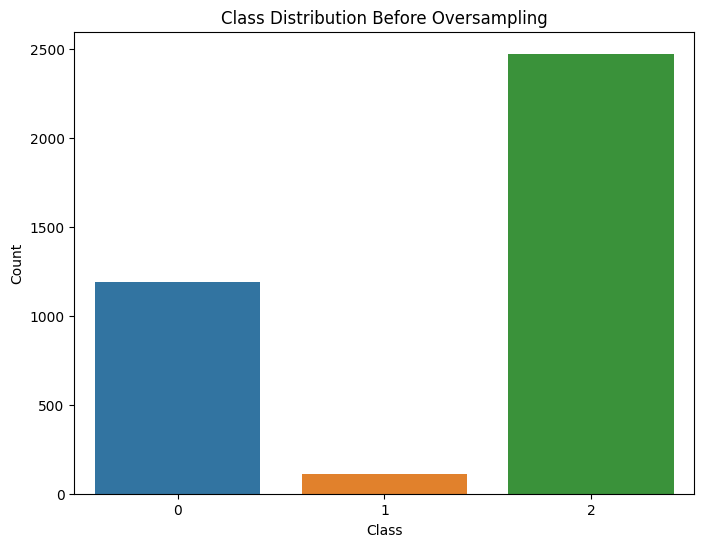

In [88]:
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title("Class Distribution Before Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [89]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode the class labels in y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Perform class balancing with RandomOverSampler on y_encoded
rdsmple = RandomOverSampler()
X_sampled, y_sampled = rdsmple.fit_resample(X, y_encoded)

In [90]:
X_sampled.shape

(7419, 17)

In [91]:
y_sampled.shape

(7419,)

In [92]:
X_sampled=pd.DataFrame(data=X_sampled,columns=X.columns)

In [93]:
X_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,goitre,hypopituitary,psych,TSH,T3,TT4
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0,109.0
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7414,93,0,0,0,0,1,0,0,0,0,0,0,0,0,2.70,0.4,77.0
7415,81,1,0,0,0,0,0,0,0,0,0,0,0,0,1.90,0.3,102.0
7416,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0.81,0.3,61.0
7417,39,0,0,0,0,0,0,0,0,0,0,0,0,0,160.00,0.4,11.0


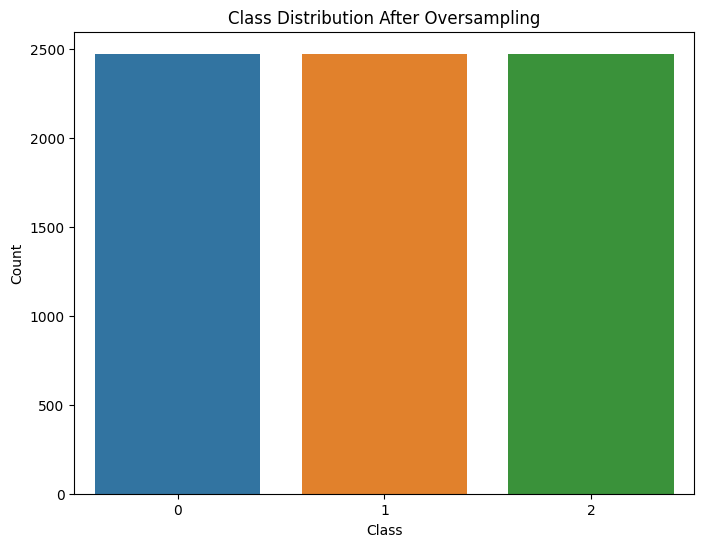

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Assuming y_sampled is a NumPy array or pandas Series
# plt.figure(figsize=(8, 6))
# sns.countplot(data=pd.Series(y_sampled, name="Class"))
# plt.title("Class Distribution After Oversampling")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.show()
# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))
sns.countplot(x=pd.Series(y_sampled, name="Class"))
plt.title("Class Distribution After Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [95]:
y_sampled

array([2, 2, 2, ..., 1, 1, 1])

In [96]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Filling Data in Various Models

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(5193, 17)
(2226, 17)


In [98]:
def svm_classifier(X_train,X_test,y_train,y_test):
    svm=SVC(kernel='rbf',random_state=0)
    svm.fit(X_train,y_train)
    y_pred=svm.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{svm.score(X_train,y_train)}\n Test Score:{svm.score(X_test,y_test)}')

In [99]:
def knn_classifier(X_train,X_test,y_train,y_test):
    knn=KNeighborsClassifier(metric='minkowski',p=2)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{knn.score(X_train,y_train)}\n Test Score:{knn.score(X_test,y_test)}')

In [100]:
def tree_classifier(X_train,X_test,y_train,y_test):
    tree =DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(X_train,y_train)
    y_pred=tree.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{tree.score(X_train,y_train)}\n Test Score:{tree.score(X_test,y_test)}')

In [101]:
def forest_classifier(X_train,X_test,y_train,y_test):
    forest=RandomForestClassifier(criterion='entropy',random_state=0)
    forest.fit(X_train,y_train)
    y_pred=forest.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    return (f'Train Score:{forest.score(X_train,y_train)}\n Test Score:{forest.score(X_test,y_test)}')

In [102]:
## Performance Metrics
forest = RandomForestClassifier(criterion = 'entropy')
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[759,   0,   5],
       [  0, 739,   0],
       [  1,   1, 721]], dtype=int64)

In [103]:
## Classification Report (Accuracy, Precision, Recall and F1 Score)
from sklearn.metrics import roc_auc_score,roc_curve,classification_report

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       764
           1       1.00      1.00      1.00       739
           2       0.99      1.00      1.00       723

    accuracy                           1.00      2226
   macro avg       1.00      1.00      1.00      2226
weighted avg       1.00      1.00      1.00      2226



In [105]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    result1=svm_classifier(X_train, X_test, y_train, y_test)
    print(result1)
    print("-"*100)
    print()

    print("KNN:\n")
    result2=knn_classifier(X_train, X_test, y_train, y_test)
    print(result2)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    result4=tree_classifier(X_train, X_test, y_train, y_test)
    print(result4)

    print("-"*100)
    print()

    print("Random Forest:\n")
    result5=forest_classifier(X_train, X_test, y_train, y_test)
    print(result5)

In [106]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train Score:0.6822645869439631
 Test Score:0.6585804132973945
----------------------------------------------------------------------------------------------------

KNN:

Train Score:0.8942807625649913
 Test Score:0.8355795148247979
----------------------------------------------------------------------------------------------------

Decision Tree:

Train Score:0.9996148661659927
 Test Score:0.9977538185085355
----------------------------------------------------------------------------------------------------

Random Forest:

Train Score:0.9996148661659927
 Test Score:0.9973045822102425


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [108]:
models = {
    'SVM': svm_classifier(X_train, X_test, y_train, y_test),
    'KNN': knn_classifier(X_train, X_test, y_train, y_test),
    'Decision Tree': tree_classifier(X_train, X_test, y_train, y_test),
    'Random Forest': forest_classifier(X_train, X_test, y_train, y_test)
}


In [109]:
metrics = {}
for model_name, model_metrics in models.items():
    train_score, test_score = model_metrics.split('\n')
    train_score = float(train_score.split(':')[1].strip())
    test_score = float(test_score.split(':')[1].strip())
    
    y_pred = forest.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    metrics[model_name] = {
        'Train Accuracy': train_score,
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


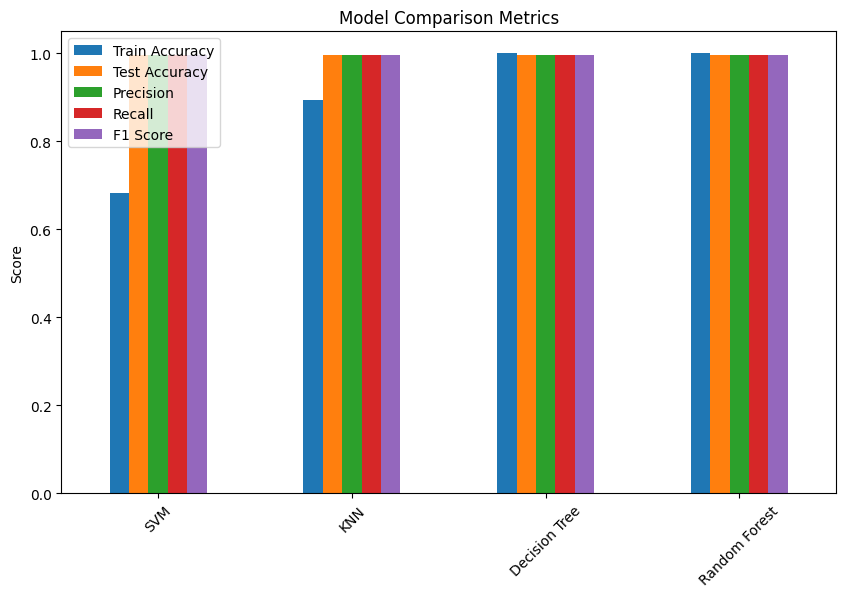

In [110]:
# Create a DataFrame from the metrics dictionary for easier plotting
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')

# Create bar plots
metrics_df.plot(kind='bar', figsize=(10, 6), title='Model Comparison Metrics')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


### Cross-validation for all models

In [111]:
from sklearn.model_selection import cross_val_score

# Define a function for cross-validation and model evaluation
def evaluate_model(model, X, y, cv=10):
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    return scores

# Create instances of your models
svm = SVC(kernel='rbf', random_state=0)
knn = KNeighborsClassifier(metric='minkowski', p=2)
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
forest = RandomForestClassifier(criterion='entropy', random_state=0)

# Perform cross-validation for each model
svm_scores = evaluate_model(svm, X, y)
knn_scores = evaluate_model(knn, X, y)
decision_tree_scores = evaluate_model(tree, X, y)
random_forest_scores = evaluate_model(forest, X, y)

# Print mean accuracy scores for each model
print("SVM Cross-Validation Mean Accuracy:", svm_scores.mean())
print("KNN Cross-Validation Mean Accuracy:", knn_scores.mean())
print("Decision Tree Cross-Validation Mean Accuracy:", decision_tree_scores.mean())
print("Random Forest Cross-Validation Mean Accuracy:", random_forest_scores.mean())


SVM Cross-Validation Mean Accuracy: 0.7380706777258501
KNN Cross-Validation Mean Accuracy: 0.7804906460078873
Decision Tree Cross-Validation Mean Accuracy: 0.9896600844876706
Random Forest Cross-Validation Mean Accuracy: 0.990455138731001


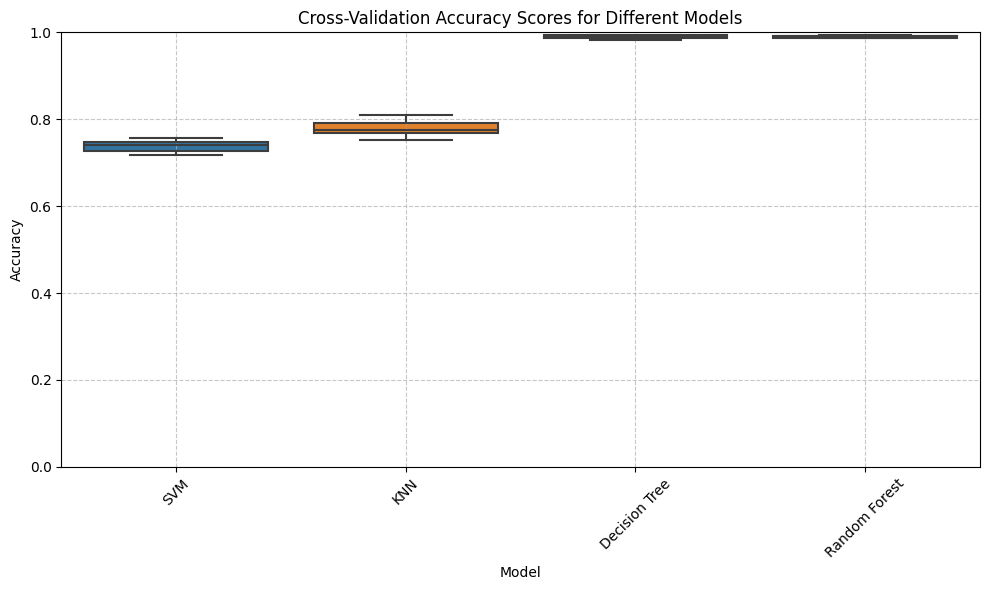

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert accuracy scores to numeric values
svm_scores_numeric = [float(score) for score in svm_scores]
knn_scores_numeric = [float(score) for score in knn_scores]
decision_tree_scores_numeric = [float(score) for score in decision_tree_scores]
random_forest_scores_numeric = [float(score) for score in random_forest_scores]

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['SVM'] * len(svm_scores_numeric) + ['KNN'] * len(knn_scores_numeric) + ['Decision Tree'] * len(decision_tree_scores_numeric) + ['Random Forest'] * len(random_forest_scores_numeric),
    'Accuracy': svm_scores_numeric + knn_scores_numeric + decision_tree_scores_numeric + random_forest_scores_numeric
})

# Create a box plot to visualize the distribution of accuracy scores for each model
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Accuracy', data=results_df)
plt.title('Cross-Validation Accuracy Scores for Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy scores (0 to 1)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


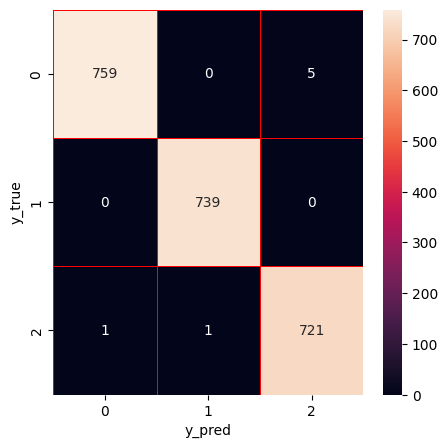

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Hyperparameter Tuning

In [114]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = forest, X=X_train,y=y_train,cv=10)
print(accuracies.mean())

0.9953775752186156


In [115]:
import pickle

pickle.dump(forest,open('thyroid.pkl','wb'))
thyroid = pickle.load(open('thyroid.pkl','rb'))

In [116]:
## Performance Metrics
forest = RandomForestClassifier(criterion = 'entropy')
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[763,   0,   1],
       [  0, 739,   0],
       [  1,   1, 721]], dtype=int64)

In [117]:
X.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'goitre',
       'hypopituitary', 'psych', 'TSH', 'T3', 'TT4'],
      dtype='object')

In [118]:
y_pred = forest.predict(X_test)

In [119]:
print(forest.predict([[70, 0 ,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61]]))

[2]


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [120]:
print(forest.predict([[80, 0 ,0,0,0,0,0,0,0,0,0,0,0,0,2.2,0.6,80]]))

[1]


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
